# 타이타닉 데이터 분석 및 시각화

---

> 타이타닉은 1912년 4월 10일 영국의 사우샘프턴에서 출항해 프랑스의 셸부르와 아일랜드의 퀸즈타운에 기항한 후 미국 뉴욕을 향해 출항하였고, 첫 항해 중 4월 15일 빙산과의 충돌로 침몰하였으며, 사망자는 1,514명으로 알려져 있음


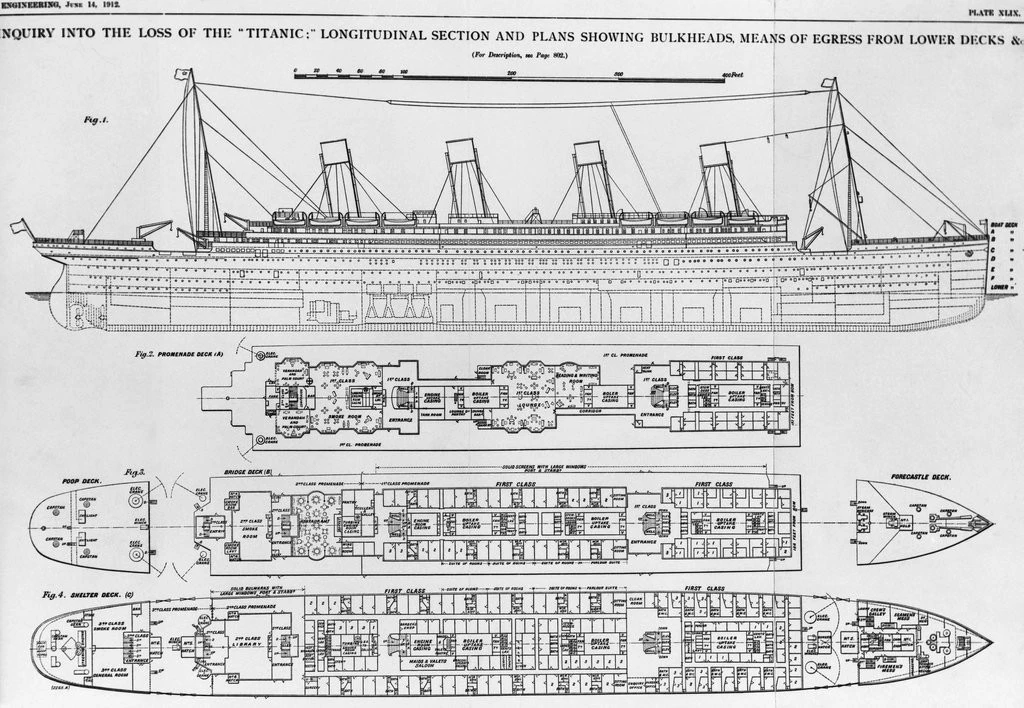

## Titanic 데이터 설명

  - survived: 생존 여부 (0=No, 1=Yes), Category
  - pclass: 선실 등급 (1=First, 2=Second, 3=Third), Category
  - sex: 성별 (0=Female, 1=Male), Category
  - age: 나이, Numeric
  - sibsp: 함께 탑승한 형제 또는 배우자 수, Numeric
  - parch: 함께 탑승한 부모 또는 자녀 수, Numeric
  - fare: 요금, Numeric
  - embarked: 탑승 장소 (S=Southhampton, C=Cherbourg, Q=Queenstown)
  - class: 선실 등급 (First, Second, Third)
  - who: 아동, 여성, 남성 구분 (Child, Woman, Man), Category
  - adult_male: 성인 남성 여부 (True, False), Category
  - deck: 배의 갑판 (A ~ G), Category
  - embark_town: 탑승 장소 (Southhampton, Cherbourg, Queenstown)
  - alive: 생존 여부 (0=No, 1=Yes), Category
  - alone: 1인 탑승 여부 (True, False), Category

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
sns.set_style('whitegrid')

titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 전처리

In [3]:
titanic.shape
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 누락값, 결측치 처리

In [4]:
titanic.dropna().describe()


,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

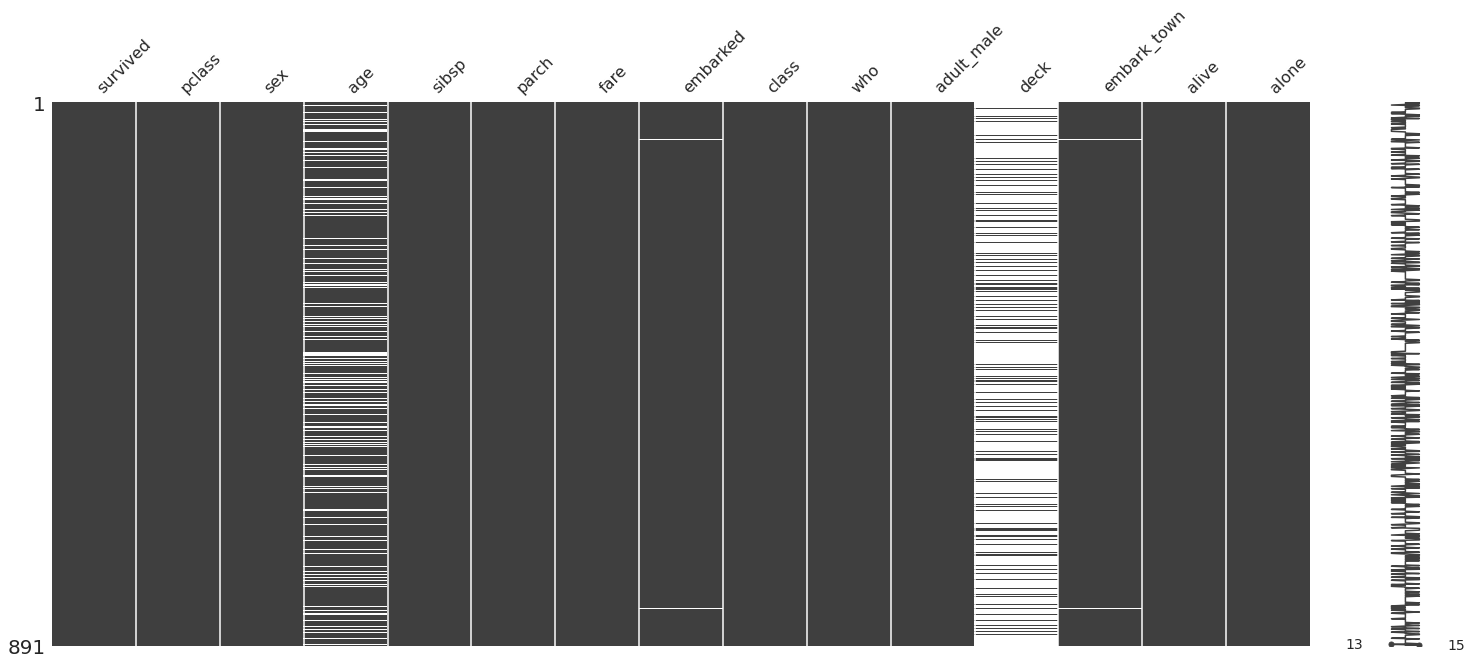

In [6]:
msno.matrix(titanic);

In [7]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [8]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [9]:
titanic.embarked.fillna('S', inplace = True)
titanic.embarked.fillna('Southampton', inplace = True)

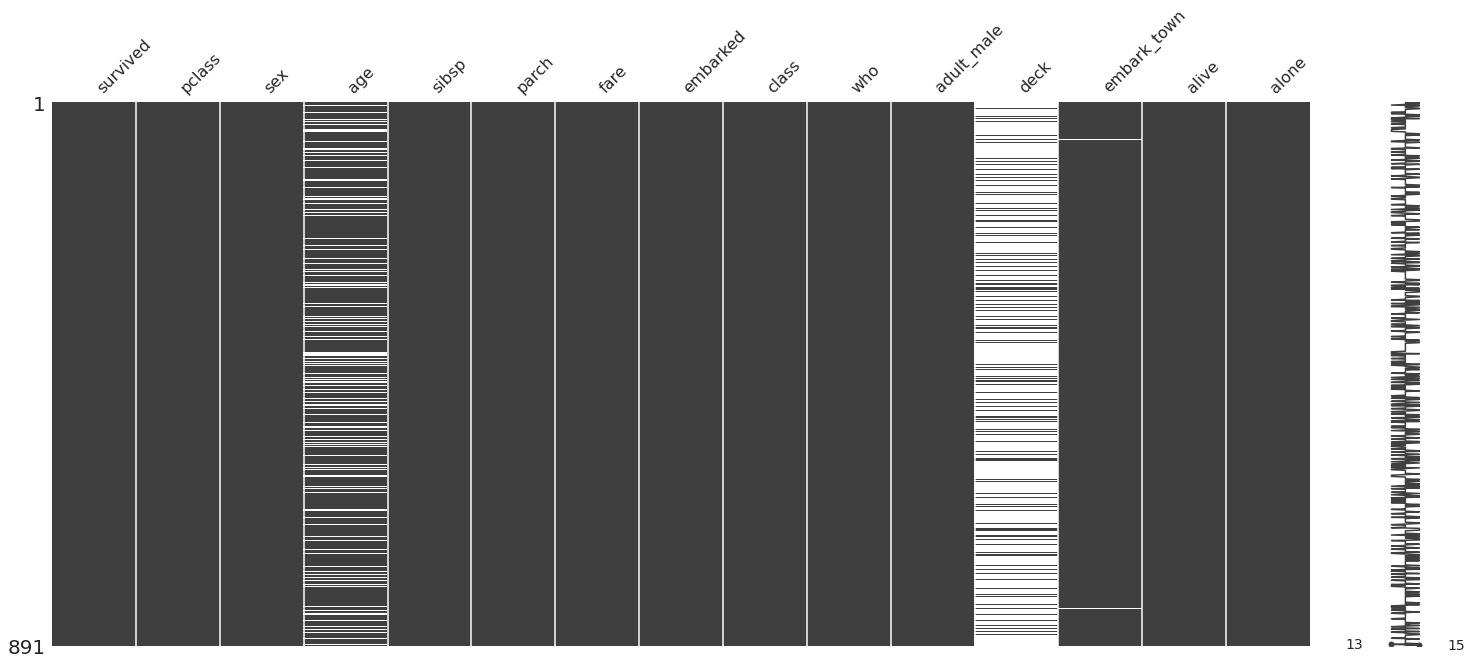

In [10]:
msno.matrix(titanic);

### 컬럼 추가

In [11]:
titanic['family'] = 1+titanic['sibsp'] + titanic['parch']
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


## 데이터 분석 및 시각화

### 집계 및 통계

#### 생존자

In [12]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

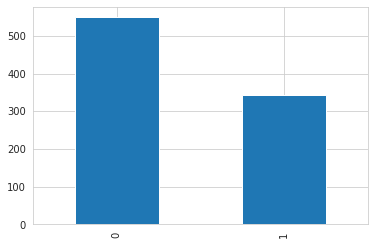

In [13]:
titanic.survived.value_counts().plot.bar();

#### 등급

In [ ]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

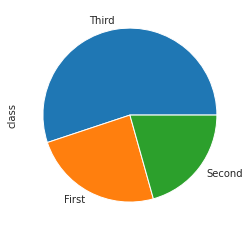

In [ ]:
titanic['class'].value_counts().plot.pie();

#### 성별

In [ ]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

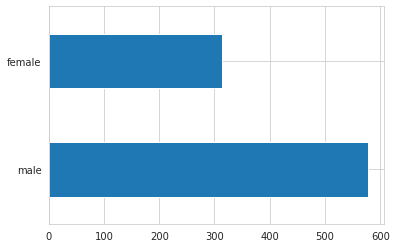

In [ ]:
titanic.sex.value_counts().plot.barh();

#### 나이

In [ ]:
titanic.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

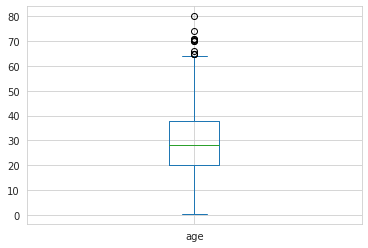

In [ ]:
titanic.age.plot.box();

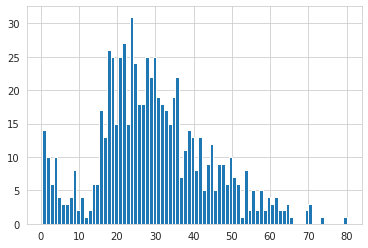

In [ ]:
titanic.age.hist(bins=80);

#### 운임료

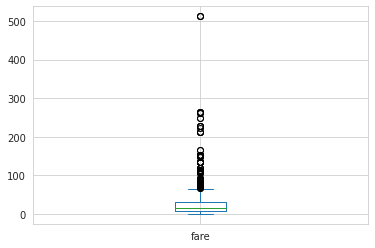

In [ ]:
titanic.fare.plot.box();

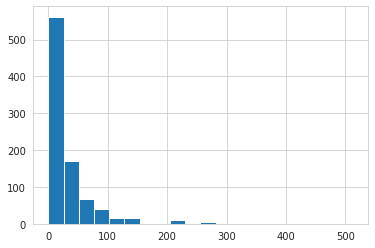

In [ ]:
titanic.fare.hist(bins=20)

#### 승선 위치

In [ ]:
titanic.embark_town.value_counts()

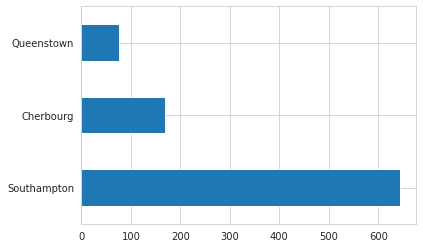

In [ ]:
titanic.embark_town.value_counts().plot.barh();

#### 갑판

In [ ]:
titanic.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

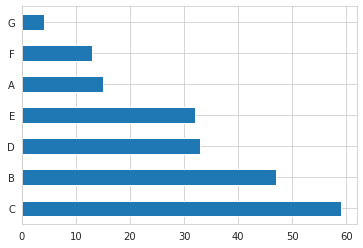

In [ ]:
titanic.deck.value_counts().plot.barh();

#### 가족

In [ ]:
titanic.family.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

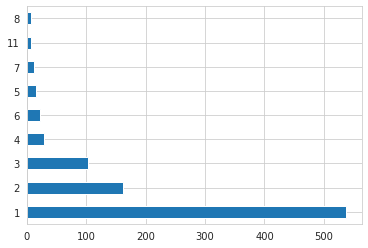

In [ ]:
titanic.family.value_counts().plot.barh();

### 그룹별 데이터

In [ ]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,family
class,,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,216,216,216,175,214,216,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491,491


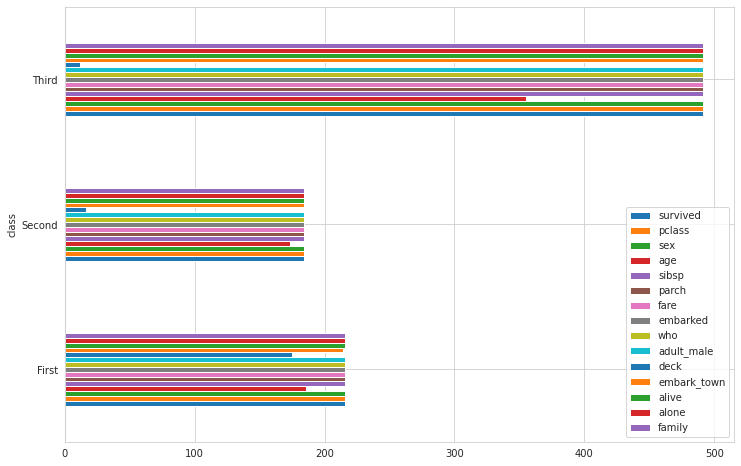

In [ ]:
titanic.groupby('class').count().plot.barh(figsize=(12, 8));

#### 등급별 생존자 비율

In [ ]:
titanic.groupby('class')['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

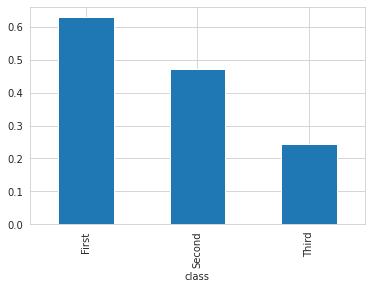

In [ ]:
titanic.groupby('class')['survived'].mean().plot.bar();


#### 등급별 탑승객 나이 평균

In [ ]:
titanic.groupby('class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

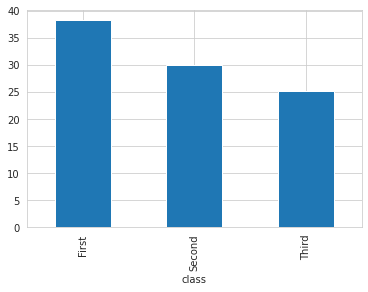

In [ ]:
titanic.groupby('class')['age'].mean().plot.bar();

#### 등급별 운임료 평균

In [ ]:
titanic.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

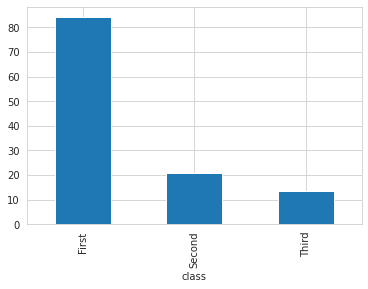

In [ ]:
titanic.groupby('class')['fare'].mean().plot.bar();

#### 성별 생존자 비율

In [ ]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

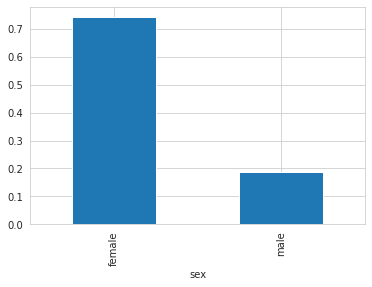

In [ ]:
titanic.groupby('sex')['survived'].mean().plot.bar();

#### 성별 탑승객 나이 평균

In [ ]:
titanic.groupby('sex')['age'].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

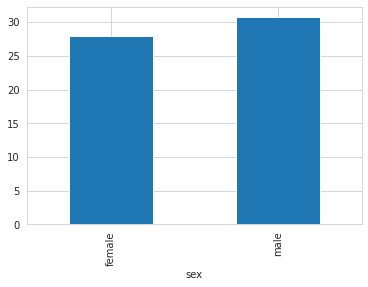

In [ ]:
titanic.groupby('sex')['age'].mean().plot.bar();

#### 성별 운임료 평균

In [ ]:
titanic.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

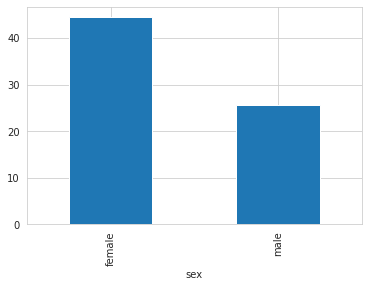

In [ ]:
titanic.groupby('sex')['fare'].mean().plot.bar();

#### 승선 위치별 생존자 비율

In [ ]:
titanic.groupby('embark_town')['survived'].mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

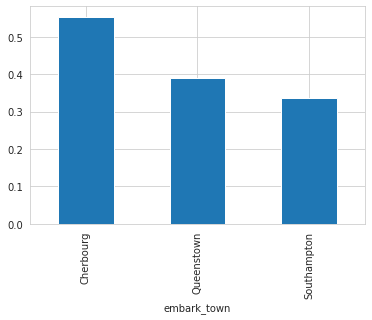

In [ ]:
titanic.groupby('embark_town')['survived'].mean().plot.bar();

#### 승선 위치별 운임료 평균

In [ ]:
titanic.groupby('embark_town')['fare'].mean()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

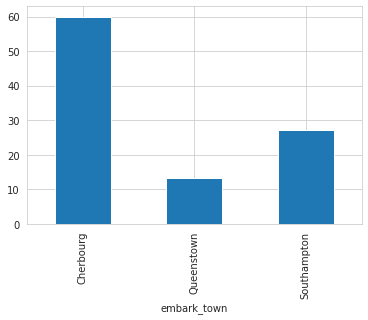

In [ ]:
titanic.groupby('embark_town')['fare'].mean().plot.bar();

#### 아동, 여성, 남성별 생존자 비율

In [ ]:
titanic.groupby('who')['survived'].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

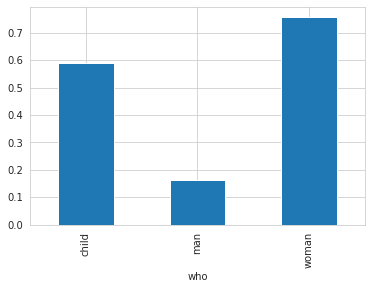

In [ ]:
titanic.groupby('who')['survived'].mean().plot.bar();

#### 아동, 여성, 남성별 운임료 평균

In [ ]:
titanic.groupby('who')['fare'].mean()

who
child    32.785795
man      24.864182
woman    46.570711
Name: fare, dtype: float64

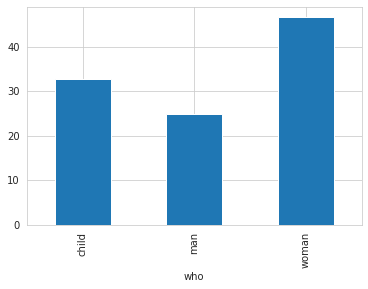

In [ ]:
titanic.groupby('who')['fare'].mean().plot.bar();

#### 갑판별 생존자 비율

In [ ]:
titanic.groupby('deck')['survived'].mean()

deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
Name: survived, dtype: float64

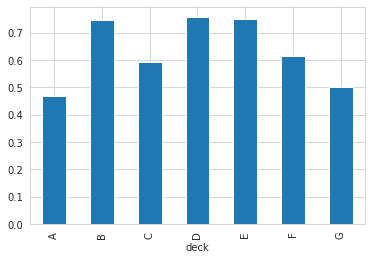

In [ ]:
titanic.groupby('deck')['survived'].mean().plot.bar();

#### 갑판별 탑승객 나이 평균

In [ ]:
titanic.groupby('deck')['age'].mean()

deck
A    44.833333
B    34.955556
C    36.086667
D    39.032258
E    38.116667
F    19.954545
G    14.750000
Name: age, dtype: float64

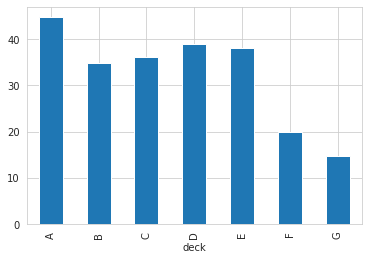

In [ ]:
titanic.groupby('deck')['age'].mean().plot.bar();

#### 갑판별 운임료 평균

In [ ]:
titanic.groupby('deck')['fare'].mean()

deck
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     46.026694
F     18.696792
G     13.581250
Name: fare, dtype: float64

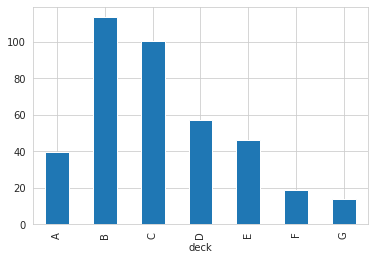

In [ ]:
titanic.groupby('deck')['fare'].mean().plot.bar();

#### 1인 탑승자 생존자 비율

In [ ]:
titanic.groupby('alone')['survived'].mean()

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64

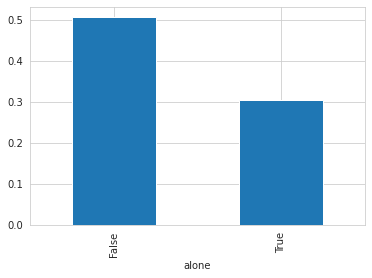

In [ ]:
titanic.groupby('alone')['survived'].mean().plot.bar();

#### 가족 탑승자 생존자 비율

In [ ]:
titanic.groupby('family')['survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

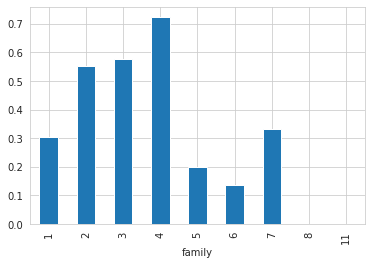

In [ ]:
titanic.groupby('family')['survived'].mean().plot.bar();

#### 등급별, 성별 생존자 비율

In [ ]:
titanic.groupby(["class", "sex"])["survived"].mean().unstack()

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


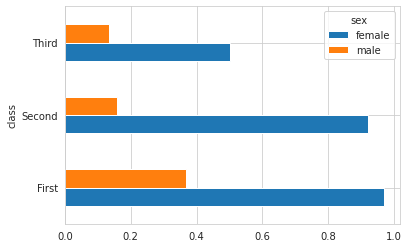

In [ ]:
titanic.groupby(["class", "sex"])["survived"].mean().unstack().plot.barh();

#### 등급별, 성별 운임료 평균

In [ ]:
titanic.groupby(["class", "sex"])["fare"].mean().unstack()


sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


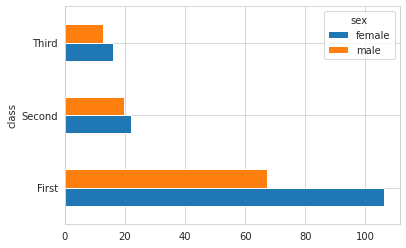

In [ ]:
titanic.groupby(["class", "sex"])["fare"].mean().unstack().plot.barh();

#### 갑판별, 성별 생존자 비율

In [ ]:
titanic.groupby(['deck', 'sex'])['survived'].mean().unstack()

sex,female,male
deck,,
A,1.000000,0.428571
B,1.000000,0.400000
C,0.888889,0.343750
D,1.000000,0.466667
E,0.933333,0.588235
F,1.000000,0.375000
G,0.500000,NaN


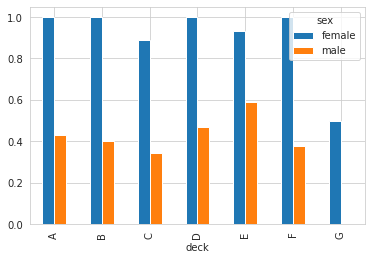

In [ ]:
titanic.groupby(['deck', 'sex'])['survived'].mean().unstack().plot.bar();

#### 갑판별, 등급별 생존자 비율

In [ ]:
titanic.groupby(['deck', 'class'])['survived'].mean().unstack()

class,First,Second,Third
deck,,,
A,0.466667,NaN,NaN
B,0.744681,NaN,NaN
C,0.593220,NaN,NaN
D,0.758621,0.750,NaN
E,0.720000,0.750,1.0
F,NaN,0.875,0.2
G,NaN,NaN,0.5


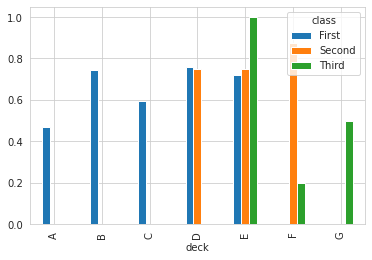

In [ ]:
titanic.groupby(['deck', 'class'])['survived'].mean().unstack().plot.bar();

#### 등급별, 아동, 여성, 남성별 생존자 비율

In [ ]:
titanic.groupby(["class", "who"])["survived"].mean().unstack()

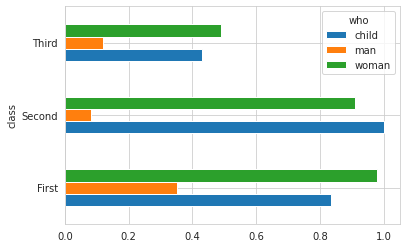

In [ ]:
titanic.groupby(["class", "who"])["survived"].mean().unstack().plot.barh();

### 생존자 정보

In [ ]:
titanic.query("alive == 'yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,3
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True,1
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,2
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1


#### 등급별 생존자 수

In [ ]:
titanic.query("alive == 'yes'").groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,family
class,,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,136,136,136,117,134,136,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119,119


In [ ]:
titanic.query("alive == 'yes'").groupby('class')['survived'].count()

class
First     136
Second     87
Third     119
Name: survived, dtype: int64

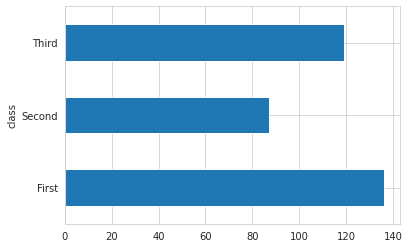

In [ ]:
titanic.query("alive == 'yes'").groupby('class')['survived'].count().plot.barh();

#### 등급별, 성별 생존자 수

In [ ]:
titanic.query("alive == 'yes'").groupby(["class", "sex"])["survived"].count().unstack()


sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


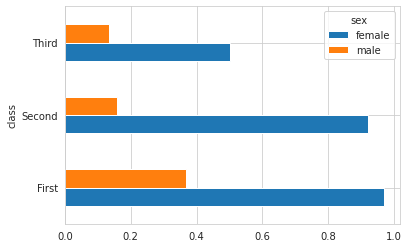

In [14]:
titanic.groupby(["class", "sex"])["survived"].mean().unstack().plot.barh();

#### 등급별 여자 생존자 수

In [15]:
titanic.query("alive == 'yes' and sex == 'female'").groupby('class')['survived'].count()

class
First     91
Second    70
Third     72
Name: survived, dtype: int64

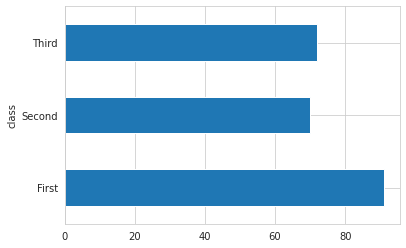

In [16]:
titanic.query("alive == 'yes' and sex == 'female'").groupby('class')['survived']\
.count().plot.barh();

#### 등급별, 아동, 여성, 남성별 생존자 수

In [17]:
titanic.query("alive == 'yes'").groupby(["class", "who"])["survived"].count().unstack()

who,child,man,woman
class,,,
First,5,42,89
Second,19,8,60
Third,25,38,56


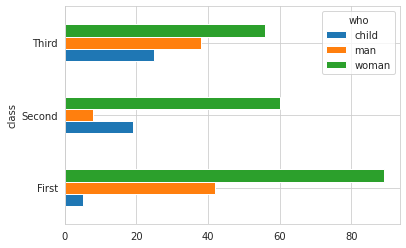

In [18]:
titanic.query("alive == 'yes'").groupby(["class", "who"])["survived"].count()\
.unstack().plot.barh();


#### 등급별, 아동 생존자 수

In [19]:
titanic.query("alive == 'yes' and who == 'child'").groupby("class")["survived"].count()

class
First      5
Second    19
Third     25
Name: survived, dtype: int64

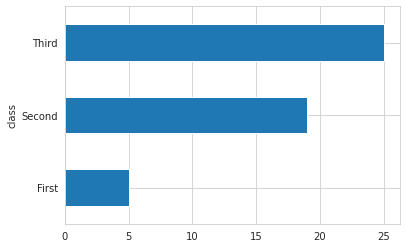

In [20]:
titanic.query("alive == 'yes' and who == 'child'").groupby("class")["survived"]\
.count().plot.barh();

#### 등급별, 아동, 여성, 남성별 생존자 비율

In [21]:
titanic.pivot_table('survived', index='class', columns='who')

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


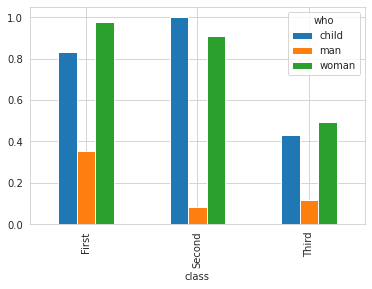

In [22]:
titanic.pivot_table('survived', index='class', columns='who').plot.bar();


#### 등급별, 나이대별 생존자 비율

In [23]:
age = pd.cut(titanic['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80])
titanic.pivot_table('survived', index='class', columns=age)

age,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
class,,,,,,,,
First,0.666667,0.833333,0.725000,0.755102,0.567568,0.600000,0.181818,0.333333
Second,1.000000,0.500000,0.409836,0.441860,0.526316,0.166667,0.333333,NaN
Third,0.431818,0.253165,0.232558,0.206349,0.066667,0.000000,0.333333,0.000000


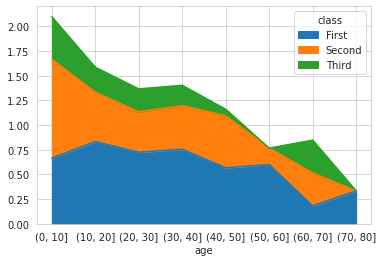

In [24]:
titanic.pivot_table('survived', index=age, columns='class').plot.area();

#### 성별, 나이대별 생존자 비율

In [25]:
titanic.pivot_table('survived', index=age, columns='sex')

sex,female,male
age,,
"(0, 10]",0.612903,0.575758
"(10, 20]",0.739130,0.144928
"(20, 30]",0.753086,0.154362
"(30, 40]",0.836364,0.230000
"(40, 50]",0.677419,0.218182
"(50, 60]",0.928571,0.142857
"(60, 70]",1.000000,0.071429
"(70, 80]",NaN,0.200000


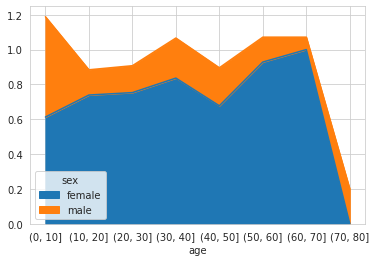

In [26]:
titanic.pivot_table('survived', index=age, columns='sex').plot.area();

#### 등급별, 아동, 여성, 남성별 생존자 비율

In [27]:
titanic.pivot_table('survived', index='who', columns='class', margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


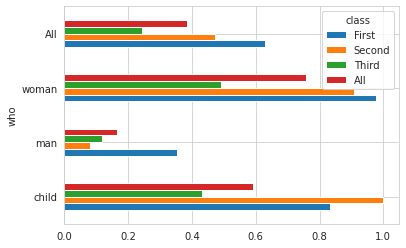

In [28]:
titanic.pivot_table('survived', index='who', columns='class', margins=True).plot.barh();

#### 등급별, 갑판별 생존자 비율

In [29]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


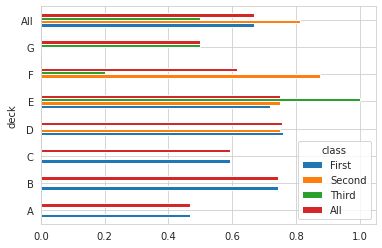

In [30]:
titanic.pivot_table('survived', index='deck', columns='class', margins=True).plot.barh();

In [31]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True)


class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


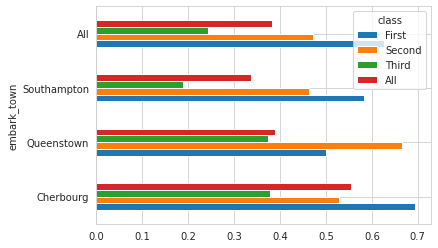

In [32]:
titanic.pivot_table('survived', index='embark_town', columns='class', margins=True).plot.barh();


### 생존자 수 DataFrame

#### 등급별 생존자 수

In [34]:
pd.crosstab(titanic.alive, titanic['class'], margins=True)\
.style.background_gradient(cmap='Blues')

class,First,Second,Third,All
alive,,,,
no,80,97,372,549
yes,136,87,119,342
All,216,184,491,891


#### 성별 생존자 수

In [35]:
pd.crosstab(titanic.alive, titanic.sex, margins=True)\
.style.background_gradient(cmap='Blues')

sex,female,male,All
alive,,,
no,81,468,549
yes,233,109,342
All,314,577,891


#### 갑판별 생존자 수

In [36]:
pd.crosstab(titanic.alive, titanic.deck, margins=True)\
.style.background_gradient(cmap='Blues')


deck,A,B,C,D,E,F,G,All
alive,,,,,,,,
no,8,12,24,8,8,5,2,67
yes,7,35,35,25,24,8,2,136
All,15,47,59,33,32,13,4,203


#### 등급별, 성별 생존자 수

In [37]:
pd.crosstab(titanic.alive, [titanic['class'], titanic.sex], margins=True)\
.style.background_gradient(cmap='Blues')

#### 등급별, 갑판별 생존자 수

In [38]:
pd.crosstab(titanic.alive, [titanic['class'], titanic.deck], margins=True)\
.style.background_gradient(cmap='Blues')